<a href="https://colab.research.google.com/github/luzyi0/2025-Vision_Computer_TI2B/blob/main/JOBSHEET02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

## Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


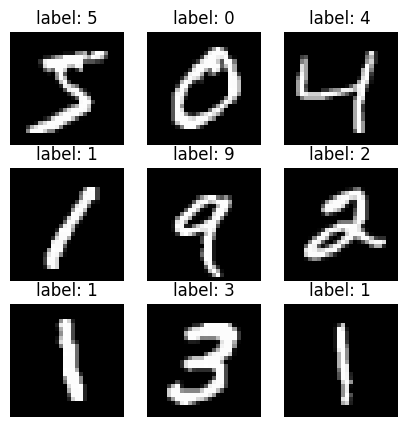

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilankan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

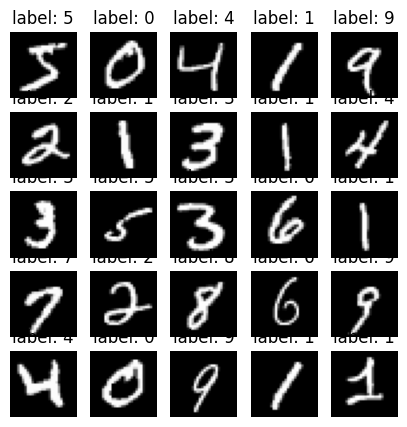

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilankan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"label: {y_train[i]}")
  plt.axis('off')
plt.show()

## Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  #gunakan subset karena berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  #gunakan subset karena berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum D3-Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8887 - loss: 0.3635 - val_accuracy: 0.9710 - val_loss: 0.0935
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9793 - loss: 0.0679 - val_accuracy: 0.9815 - val_loss: 0.0638
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9870 - loss: 0.0421 - val_accuracy: 0.9883 - val_loss: 0.0505
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9875 - val_loss: 0.0521


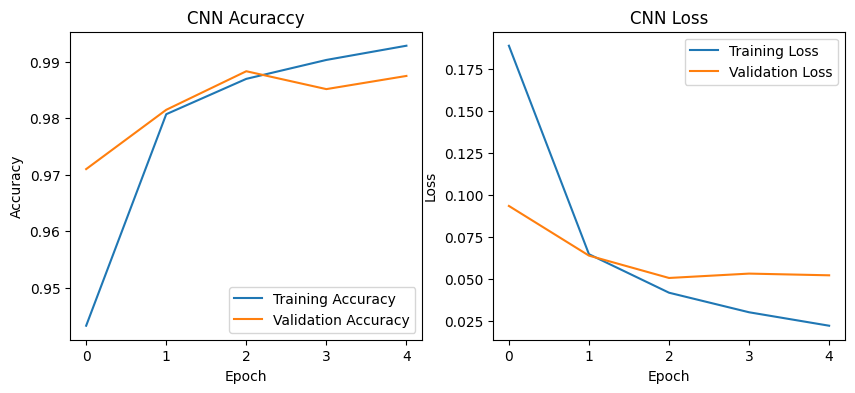

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8905 - loss: 0.3550 - val_accuracy: 0.9835 - val_loss: 0.0532
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9833 - loss: 0.0546 - val_accuracy: 0.9888 - val_loss: 0.0365
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9875 - val_loss: 0.0429
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9923 - loss: 0.0233 - val_accuracy: 0.9885 - val_loss: 0.0404
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9907 - val_loss: 0.0373


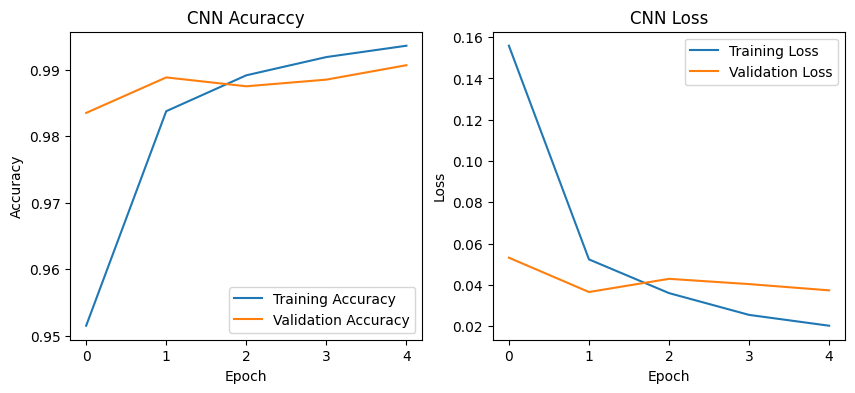

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot history ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D4-Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.3525 - loss: 1.7642 - val_accuracy: 0.5368 - val_loss: 1.3044
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5812 - loss: 1.1936 - val_accuracy: 0.6138 - val_loss: 1.1017
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.6377 - loss: 1.0413 - val_accuracy: 0.6522 - val_loss: 1.0135
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.6717 - loss: 0.9361 - val_accuracy: 0.6492 - val_loss: 1.0061
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 35ms/step - accuracy: 0.7001 - loss: 0.8665 - val_accuracy: 0.6632 - val_loss: 0.9626
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.7193 - loss: 0.8092 - val_accuracy: 0.6756 - val_loss: 0.9275
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7364 - loss: 0.7622 - val_accuracy: 0.6850 - val_loss: 0.9391
Epoch 8/10
1407/1407 ━

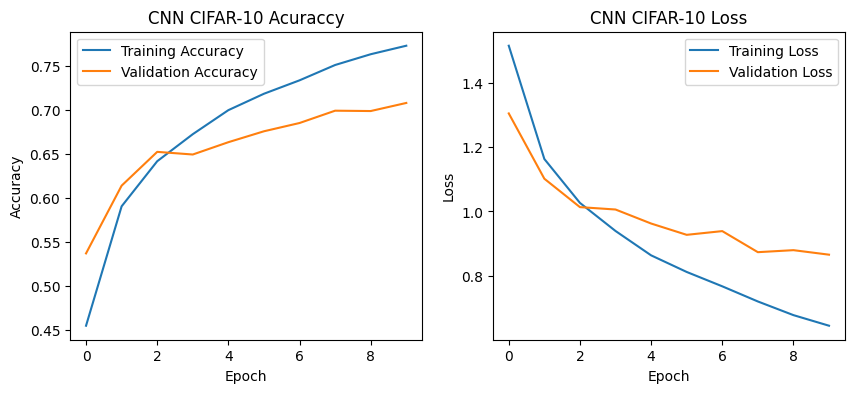

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.2715 - loss: 1.9480 - val_accuracy: 0.4878 - val_loss: 1.4567
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.4344 - loss: 1.5404 - val_accuracy: 0.5652 - val_loss: 1.2554
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.4901 - loss: 1.4089 - val_accuracy: 0.5828 - val_loss: 1.1701
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.5231 - loss: 1.3251 - val_accuracy: 0.6086 - val_loss: 1.0955
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5461 - loss: 1.2524 - val_accuracy: 0.6294 - val_loss: 1.0581
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5641 - loss: 1.2083 - val_accuracy: 0.6278 - val_loss: 1.0550
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5868 - loss: 1.1566 - val_accuracy: 0.6486 - val_loss: 1.0073
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.5984 -

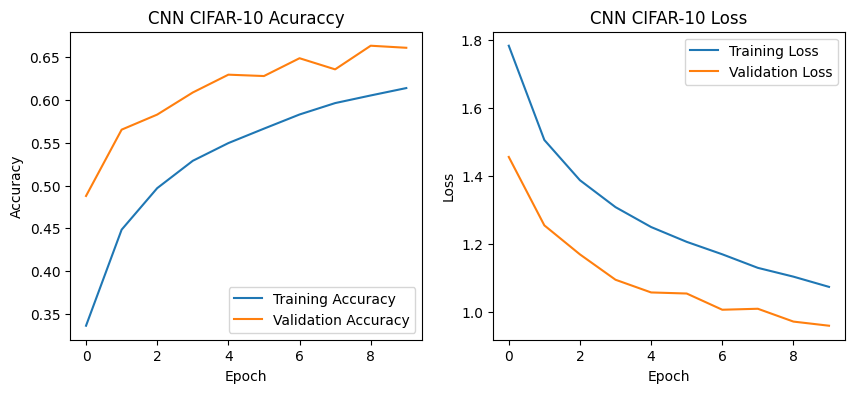

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ==== Plot history ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Acuraccy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D5 - Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 510s 361ms/step - accuracy: 0.4525 - loss: 1.5719 - val_accuracy: 0.5638 - val_loss: 1.2482
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 592s 382ms/step - accuracy: 0.5772 - loss: 1.2144 - val_accuracy: 0.5908 - val_loss: 1.1633
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 566s 385ms/step - accuracy: 0.6035 - loss: 1.1378 - val_accuracy: 0.6036 - val_loss: 1.1439
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 508s 361ms/step - accuracy: 0.6206 - loss: 1.0911 - val_accuracy: 0.6022 - val_loss: 1.1331
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 558s 358ms/step - accuracy: 0.6329 - loss: 1.0583 - val_accuracy: 0.6106 - val_loss: 1.1093


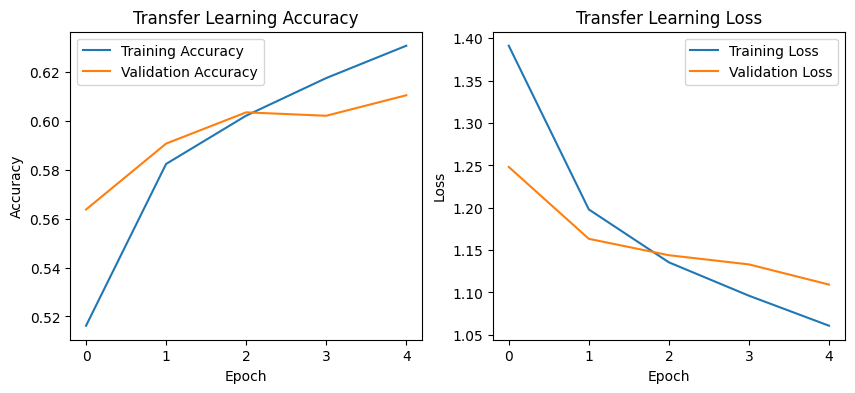

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4331s 3s/step - accuracy: 0.2032 - loss: 2.0011 - val_accuracy: 0.4050 - val_loss: 1.5321
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4375s 3s/step - accuracy: 0.4434 - loss: 1.4471 - val_accuracy: 0.5550 - val_loss: 1.2360
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4398s 3s/step - accuracy: 0.5870 - loss: 1.1259 - val_accuracy: 0.6598 - val_loss: 0.9740
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4433s 3s/step - accuracy: 0.6642 - loss: 0.9501 - val_accuracy: 0.6548 - val_loss: 1.0196
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4456s 3s/step - accuracy: 0.7153 - loss: 0.8202 - val_accuracy: 0.7234 - val_loss: 0.8256


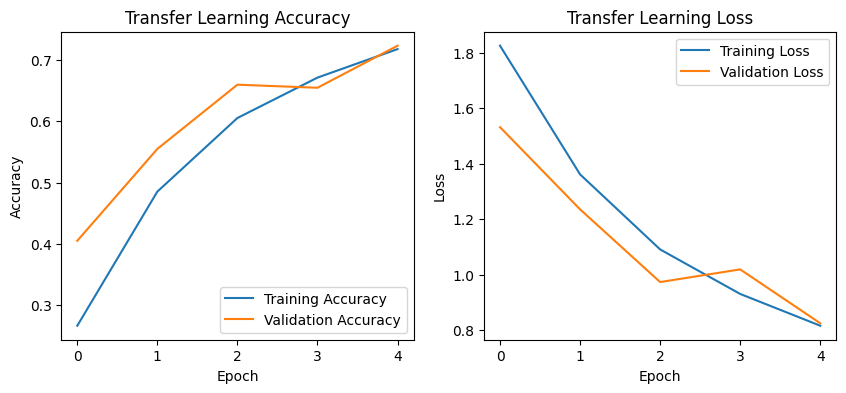

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

for layer in base_model.layers:
  layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 331ms/step
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.91      0.82      0.86      1000
           2       0.61      0.53      0.57      1000
           3       0.42      0.47      0.44      1000
           4       0.63      0.73      0.67      1000
           5       0.62      0.65      0.64      1000
           6       0.75      0.78      0.77      1000
           7       0.78      0.78      0.78      1000
           8       0.87      0.81      0.84      1000
           9       0.84      0.81      0.83      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



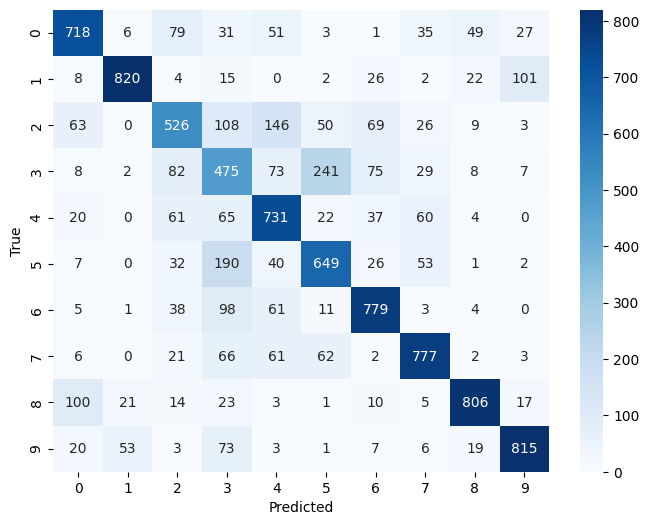

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# PENUGASAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Bangun CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 31ms/step - accuracy: 0.8750 - loss: 0.4022 - val_accuracy: 0.9856 - val_loss: 0.0409
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9752 - loss: 0.0806 - val_accuracy: 0.9896 - val_loss: 0.0320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9829 - loss: 0.0567 - val_accuracy: 0.9900 - val_loss: 0.0296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9888 - val_loss: 0.0328
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9920 - val_loss: 0.0267


In [5]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-
# hitam) =====

import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar
    jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi
    # putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)
    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))
    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size
    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))
    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)

    arr = arr[..., None]
    return canvas, arr

Saving angka_2.jpg to angka_2.jpg
Saving angka_5.jpg to angka_5 (1).jpg
Saving angka_7.jpg to angka_7.jpg
Saving angka_8.jpg to angka_8.jpg
Saving angka_9.jpg to angka_9.jpg


In [6]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Melakukan preprocessing pada gambar PIL untuk mengubahnya
    menjadi format 28x28, grayscale, dan dinormalisasi seperti dataset MNIST.
    """
    # 1. Konversi ke grayscale dan auto-contrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # 2. Invert warna jika latar belakangnya putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # 3. Cari bounding box (kotak pembatas) dari digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # 4. Resize gambar agar digit berukuran 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w, h = img.size

    # 5. Tambahkan padding untuk membuat ukuran gambar menjadi 28x28
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # 6. Normalisasi nilai piksel ke rentang [0,1] dan ubah shape ke (28,28,1)
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]

    return canvas, arr

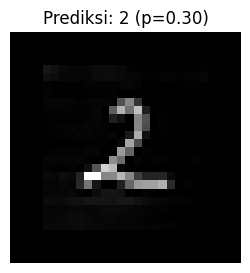

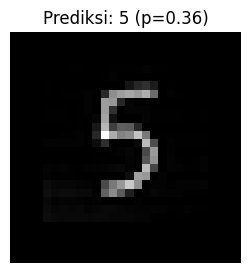

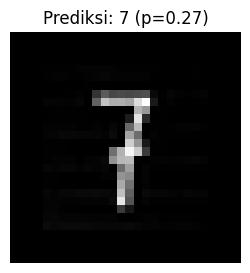

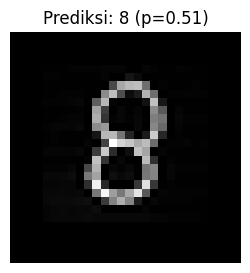

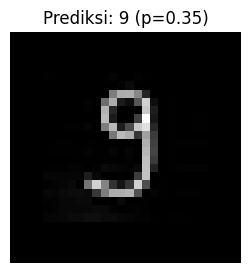


Rekap Prediksi (CNN):
- angka_2.jpg -> 2 (p=0.301)
- angka_5 (1).jpg -> 5 (p=0.356)
- angka_7.jpg -> 7 (p=0.275)
- angka_8.jpg -> 8 (p=0.505)
- angka_9.jpg -> 9 (p=0.345)


In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Pilihan A: Prediksi dengan CNN dari D3
# Pastikan Anda sudah menjalankan D3 dan memiliki variabel 'model' (Keras) terlatih pada MNIST.

results = []
if 'model' not in locals():
    print("FATAL ERROR: Variabel 'model' (CNN) tidak ditemukan. Pastikan Anda sudah melatih model di praktikum D3.")
else:
    for fname in uploaded.keys():
        try:
            img_pil = Image.open(fname)
        except Exception as e:
            print(f"Error saat membuka file {fname}: {e}")
            continue

        # disp: PIL untuk ditampilkan, x: (28,28,1)
        disp, x = preprocess_to_mnist_28x28(img_pil)

        # Ubah ke shape yang dibutuhkan CNN: (1, 28, 28, 1)
        x_batch = np.expand_dims(x, axis=0)

        # Prediksi menggunakan model CNN (Keras)
        probs = model.predict(x_batch, verbose=0)[0]
        pred = int(np.argmax(probs))
        conf = float(np.max(probs))

        results.append((fname, pred, conf))

        # Tampilkan hasil
        plt.figure(figsize=(3,3))
        plt.imshow(disp, cmap='gray')
        plt.title(f"Prediksi: {pred} (p={conf:.2f})")
        plt.axis('off')
        plt.show()

    # Rekap ringkas
    print("\nRekap Prediksi (CNN):")
    for r in results:
        print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")